In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
df = pd.read_csv('zomato.csv')
dataset = df.copy()

In [3]:
# getting insights of the data
df.head()
#df.info()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
# deleting unnecessary data
del df['url']
del df['address']
del df['phone']
del df['reviews_list']
del df['menu_item']

In [6]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [19]:
# rate feature
#df['rate'].value_counts()
df['rate'].isnull().sum()

0

In [10]:
#df.info()

In [16]:
# Removing '/5' from rate column
df['rate'] = df['rate'].apply(lambda x: str(x).split('/')[0])

In [20]:
# renaming features 
df = df.rename(columns = {"approx_cost(for two people)" : "avg_cost", "listed_in(type)" : "meal_type", 
                   "listed_in(city)" : "city"})

In [21]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,avg_cost,meal_type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [38]:
df['city'].value_counts()
#df['location'].value_counts()
#df['city'].isnull().sum()
#df['location'].isnull().sum()

BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Residency Road           1620
Whitefield               1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: city, dtype: int64

In [52]:
# It seems that city attribute is better than location attribute 

In [32]:
del df['location']

In [36]:
df.head()

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,avg_cost,meal_type,city
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [34]:
# checking null values
df.isnull().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
rest_type         227
dish_liked      28078
cuisines           45
avg_cost          346
meal_type           0
city                0
dtype: int64

In [37]:
# Number of cities we have
len(df['city'].value_counts())

30

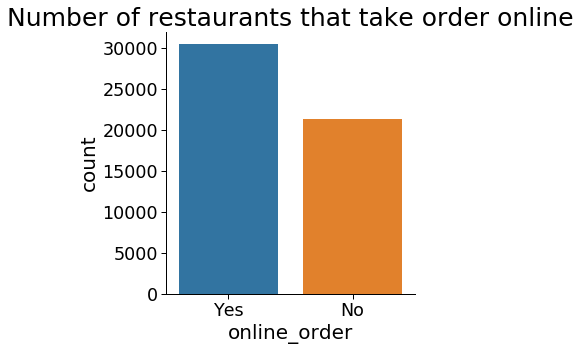

In [57]:
# plotting number of restaurtants that take online_order
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
sns.catplot(data = df, kind = 'count', x = 'online_order')
plt.title('Number of restaurants that take order online')
plt.show()

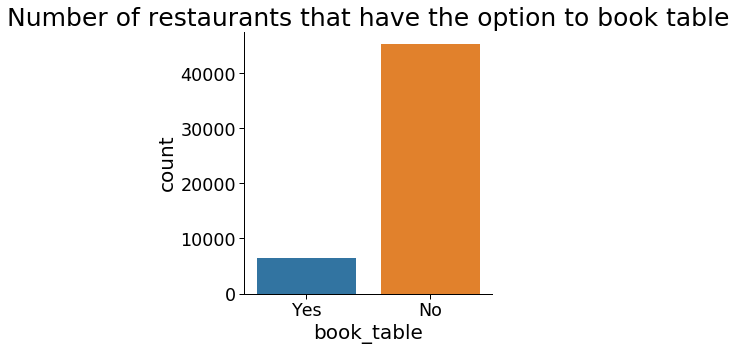

In [58]:
# plotting number of restaurants that have the option to book table
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20, "axes.titlesize": 25, "axes.labelsize": 20})   
sns.catplot(data = df, kind = 'count', x = 'book_table')
plt.title('Number of restaurants that have the option to book table')
plt.show()

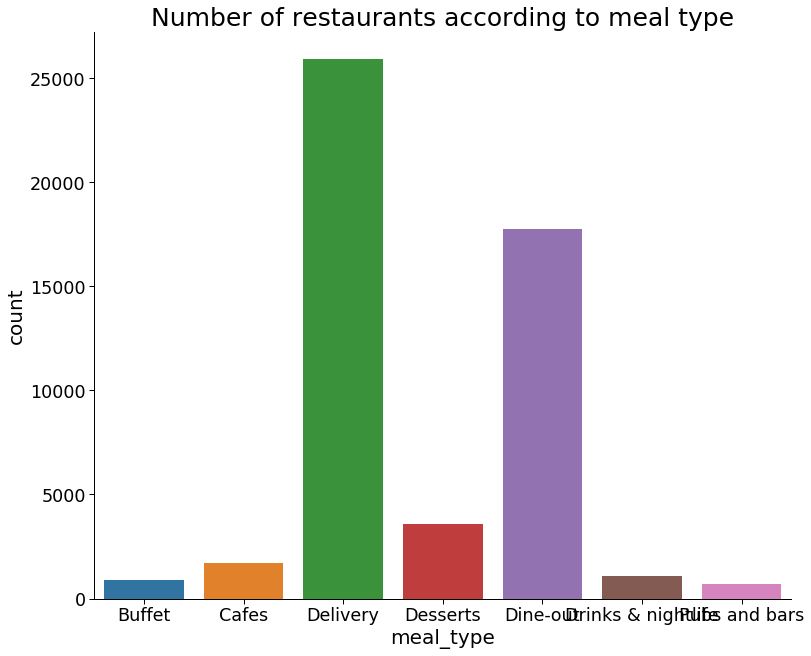

In [47]:
# plotting number of restaurants with meal type
sns.set_context("paper", font_scale = 2, rc = {"font.size": 10,"axes.titlesize": 25,"axes.labelsize": 20})   
sns.catplot(data = df, kind = 'count', x = 'meal_type')
plt.title('Number of restaurants according to meal type')
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()
# we have highest number of delivery type restaurants

Text(0.5, 1.0, 'Type of Service')

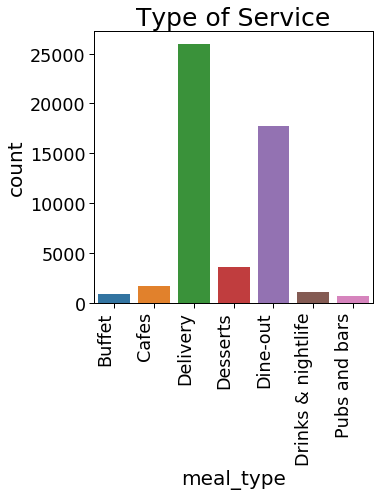

In [68]:
sns.countplot(df['meal_type'])
sns.countplot(df['meal_type']).set_xticklabels(sns.countplot(df['meal_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Type of Service')

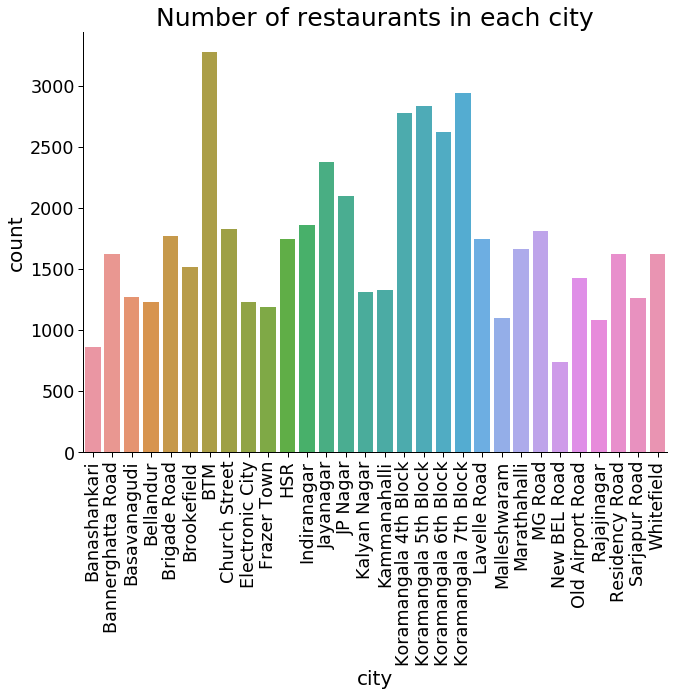

In [78]:
# plotting number of restaurants in each city
sns.set_context("paper", font_scale = 2, rc={"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.catplot(data = df, kind = 'count', x = 'city')
plt.title('Number of restaurants in each city')
b.set_xticklabels(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(15,8)
plt.show()

In [49]:
# tuning rate feature, converting '-' and 'NEW' to unrated
a = list(df['rate'])
for i in range(0, len(a)):
    if a[i] == 'nan':
        a[i] = 'unrated'
    elif a[i] == '-':
        a[i] = 'unrated'
    elif a[i] == 'NEW':
        a[i] = 'unrated'

In [50]:
df['rate'] = a

In [52]:
#df['rate'].value_counts()

In [82]:
df.head()

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,avg_cost,meal_type,city
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [53]:
a = list(df['rate'])
for i in range(0, len(a)):
    if a[i] == 'unrated':
        a[i] = None
    else :
        a[i] = float(a[i])
df['rate'] = a

In [55]:
#df['rate'].value_counts()

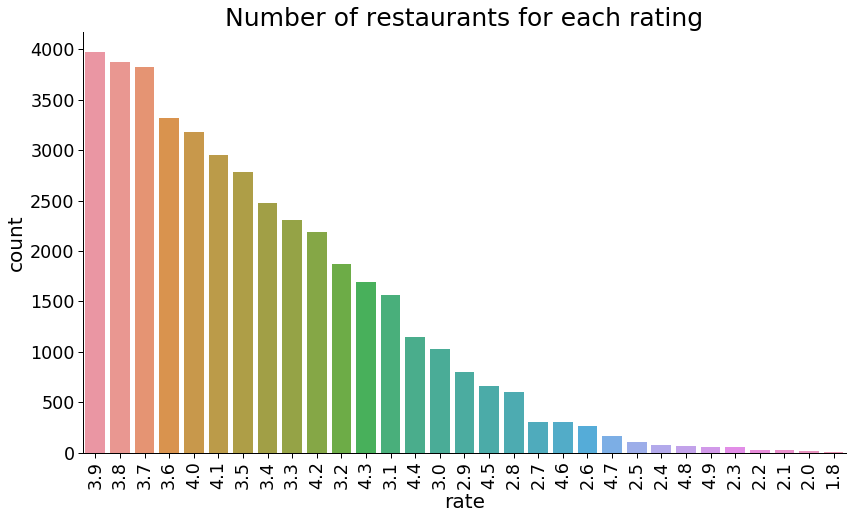

In [56]:
# Plotting the number of restaurants for each rating
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.catplot(data = df, kind = 'count', x = 'rate', order = df['rate'].value_counts().index)
plt.title('Number of restaurants for each rating')
b.set_xticklabels(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(15,8)
plt.show()

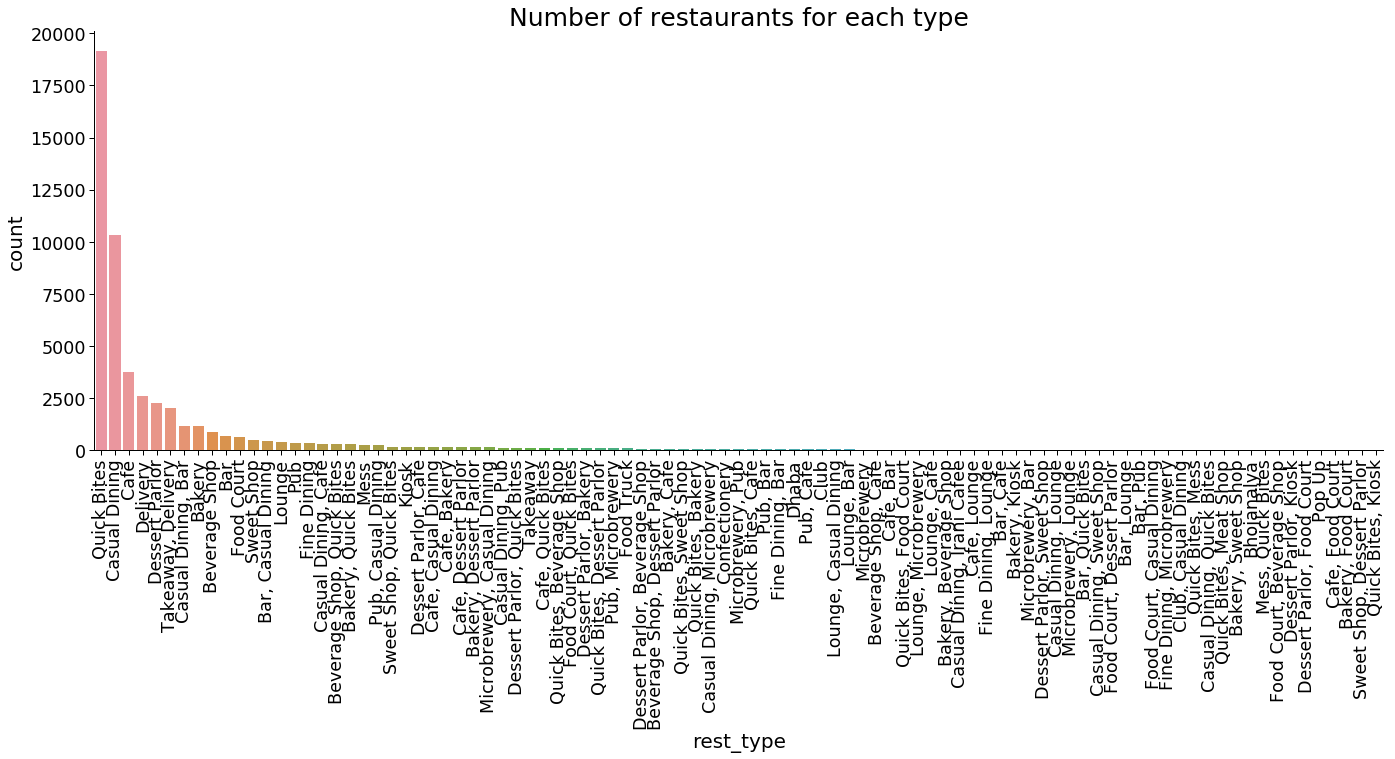

In [57]:
# Plotting count plot of rest_type
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.catplot(data = df, kind = 'count', x = 'rest_type', order = df['rest_type'].value_counts().index)
plt.title('Number of restaurants for each type')
b.set_xticklabels(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(50,8)
plt.show()

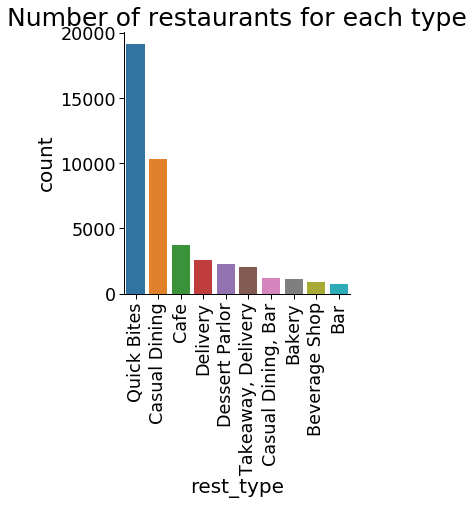

In [59]:
# count plot of top 10
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.catplot(data = df, kind = 'count', x = 'rest_type', order = df['rest_type'].value_counts().head(10).index)
plt.title('Number of restaurants for each type')
b.set_xticklabels(rotation = 90)
plt.show()

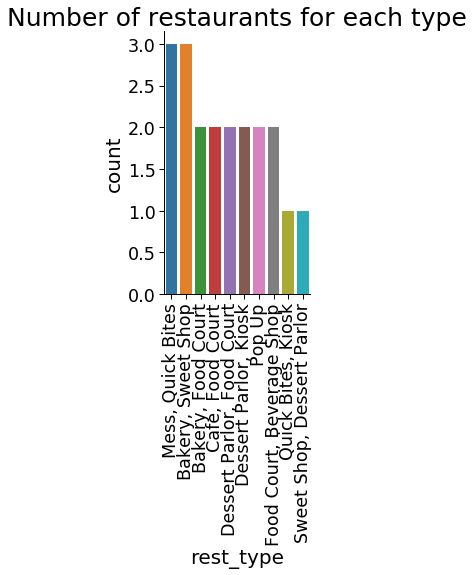

In [95]:
# count plot of type last 10
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.catplot(data = df, kind = 'count', x = 'rest_type', order = df['rest_type'].value_counts().tail(10).index)
plt.title('Number of restaurants for each type')
b.set_xticklabels(rotation = 90)
plt.show()

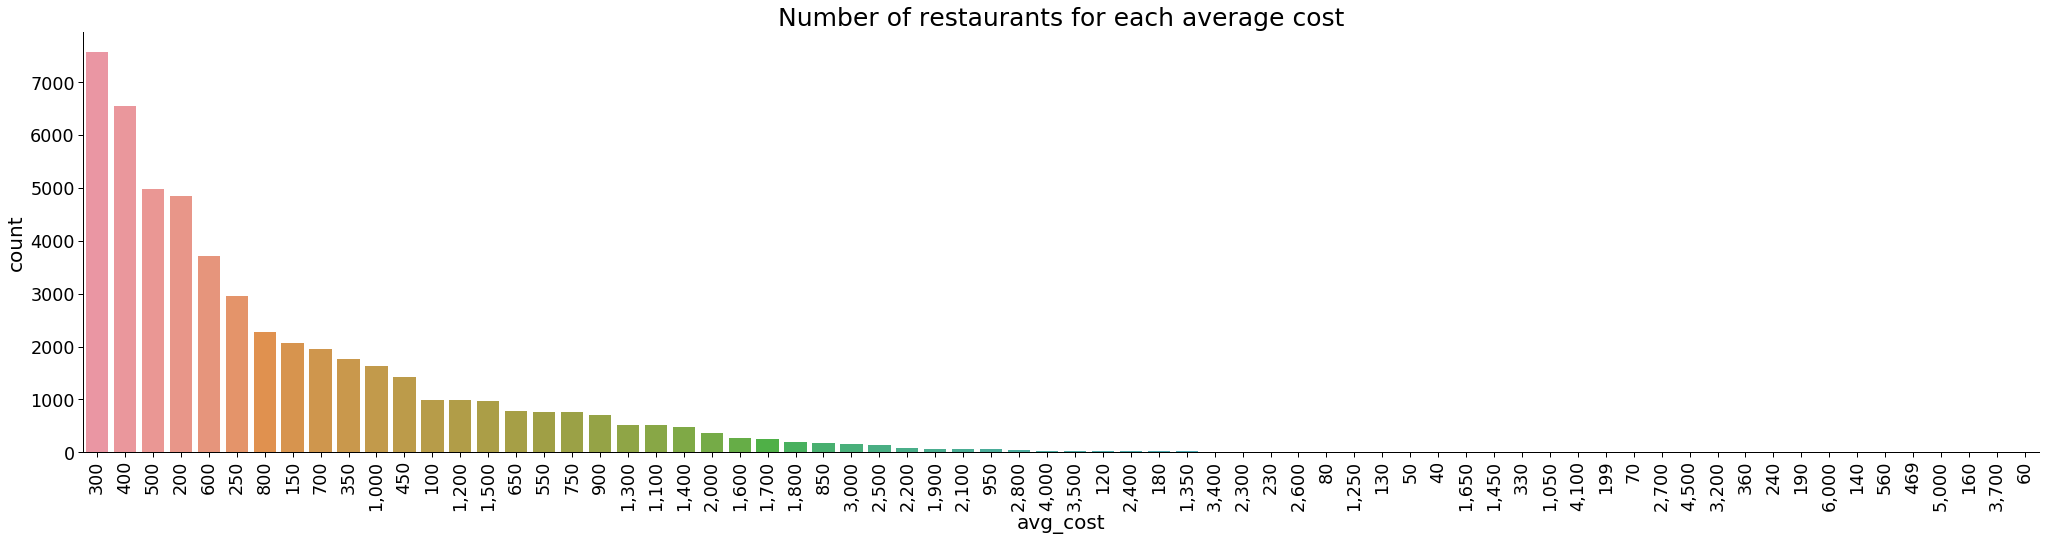

In [98]:
# plotting count plot for avg_cost
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.catplot(data = df, kind = 'count', x = 'avg_cost', order = df['avg_cost'].value_counts().index)
plt.title('Number of restaurants for each average cost')
b.set_xticklabels(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(40,8)
plt.show()
# This is done to see the competition

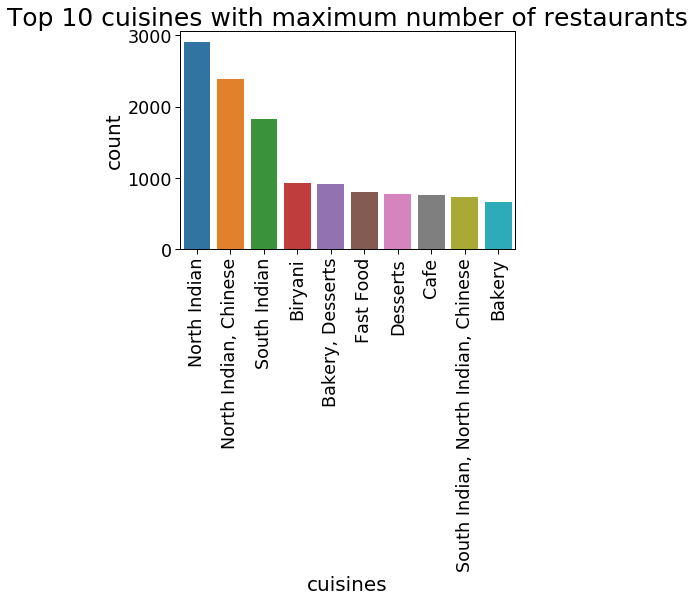

In [60]:
# count plot of cuisines
b = sns.countplot(data = df, x = 'cuisines', order = df.cuisines.value_counts().iloc[: 10].index)
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Top 10 cuisines with maximum number of restaurants')
plt.show()

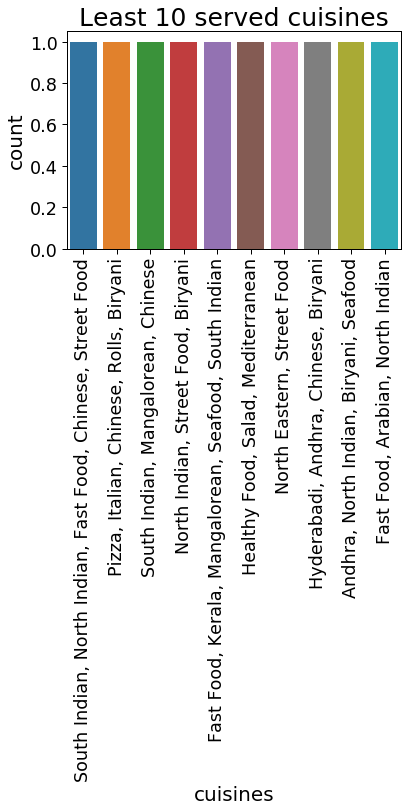

In [61]:
# count plot of last 10 cuisines
b = sns.countplot(data = df, x = 'cuisines', order = df.cuisines.value_counts().tail(10).iloc[: 10].index)
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Least 10 served cuisines')
plt.show()

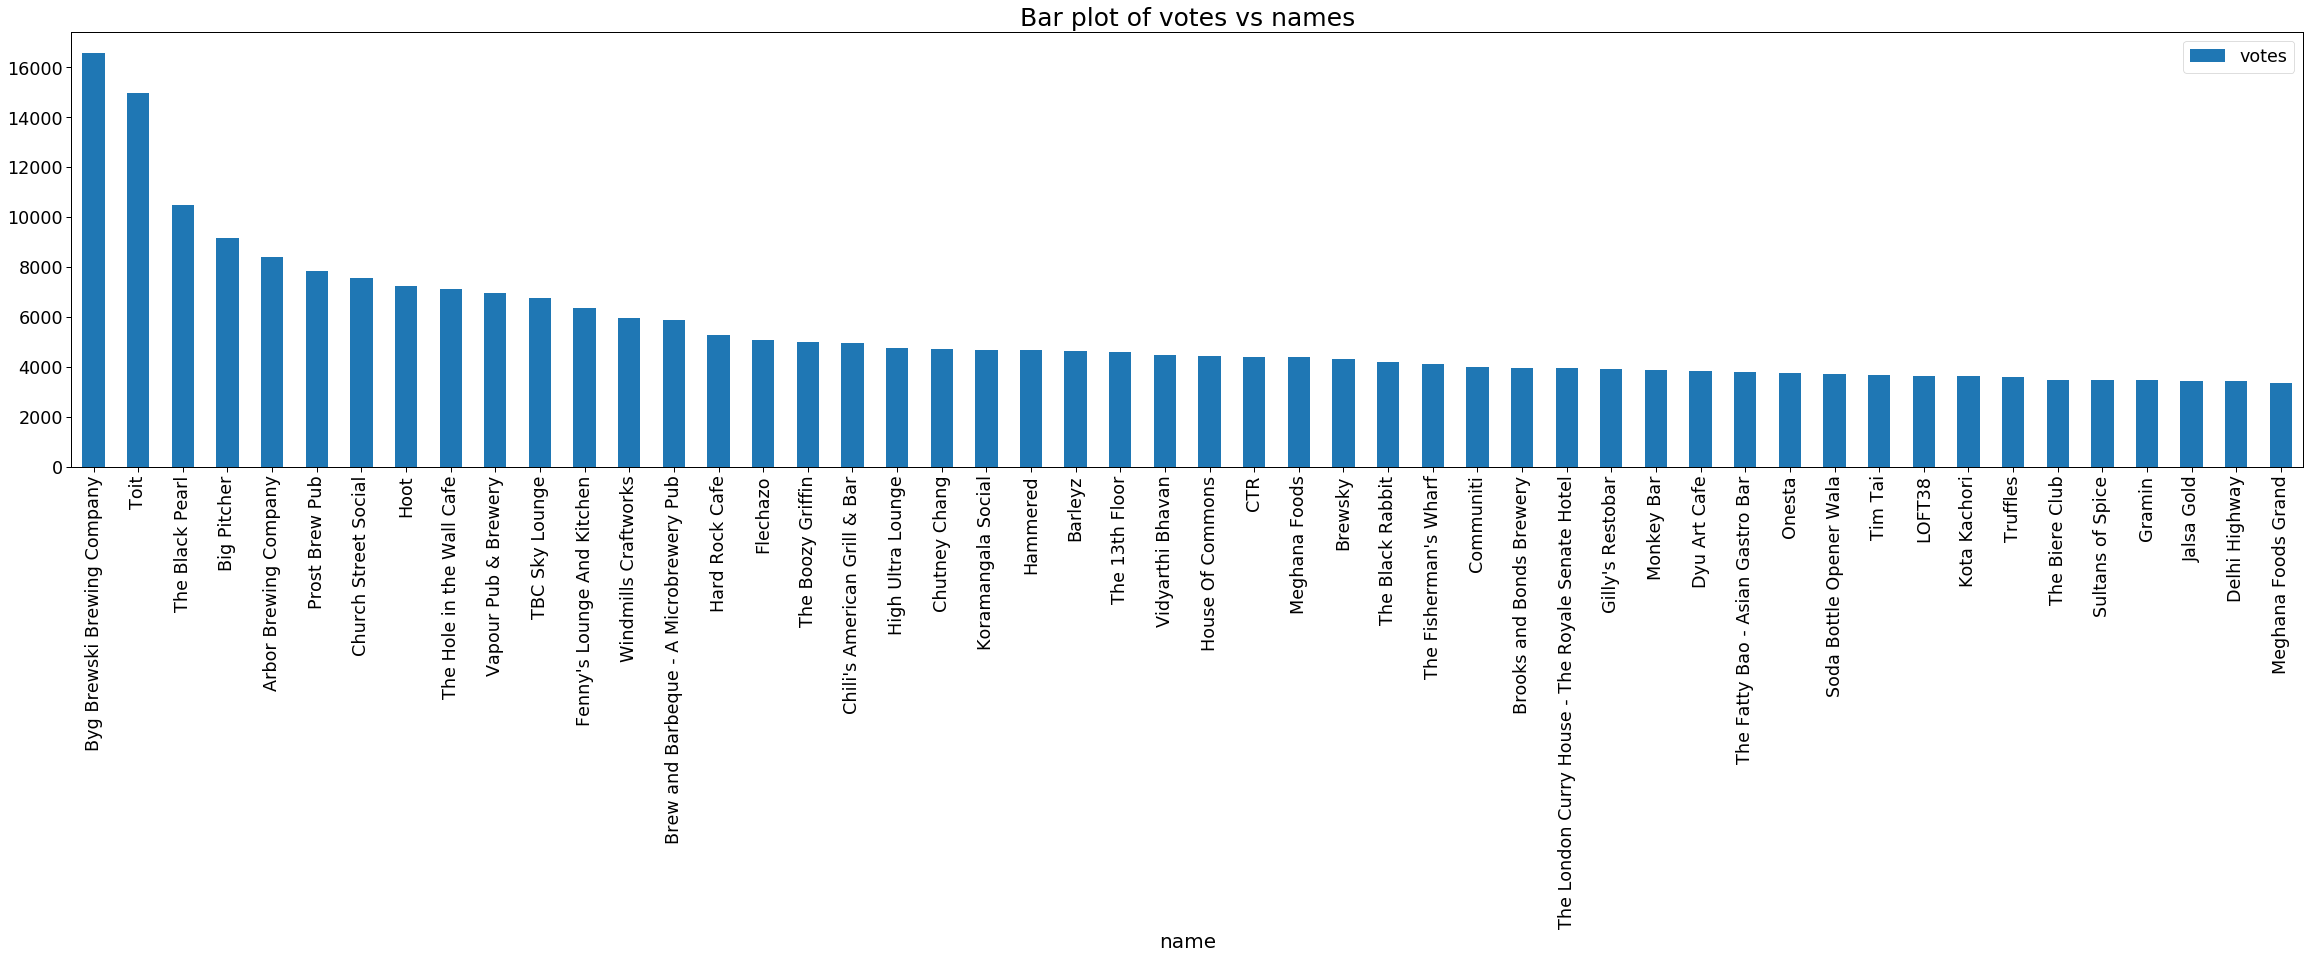

In [62]:
# Bar plot of first 50 restaurants as per votes
df[['votes', 'name']].groupby(['name']).median().sort_values("votes", ascending = False).head(50).plot.bar()
plt.title('Bar plot of votes vs names')
fig = plt.gcf()
fig.set_size_inches(40,8)
plt.show()

In [63]:
# finding the details of the most voted restaurant
b=[]
a = df.iloc[:, :].values
for i in range(0, len(a)):
    if a[i][0] == 'Byg Brewski Brewing Company' or a[i][0] == 'Byg Brewski Brewing Company ' or a[i][0] == ' Byg Brewski Brewing Company':
        b.append(list(a[i]))

In [64]:
b = pd.DataFrame(b)
b.columns = df.columns

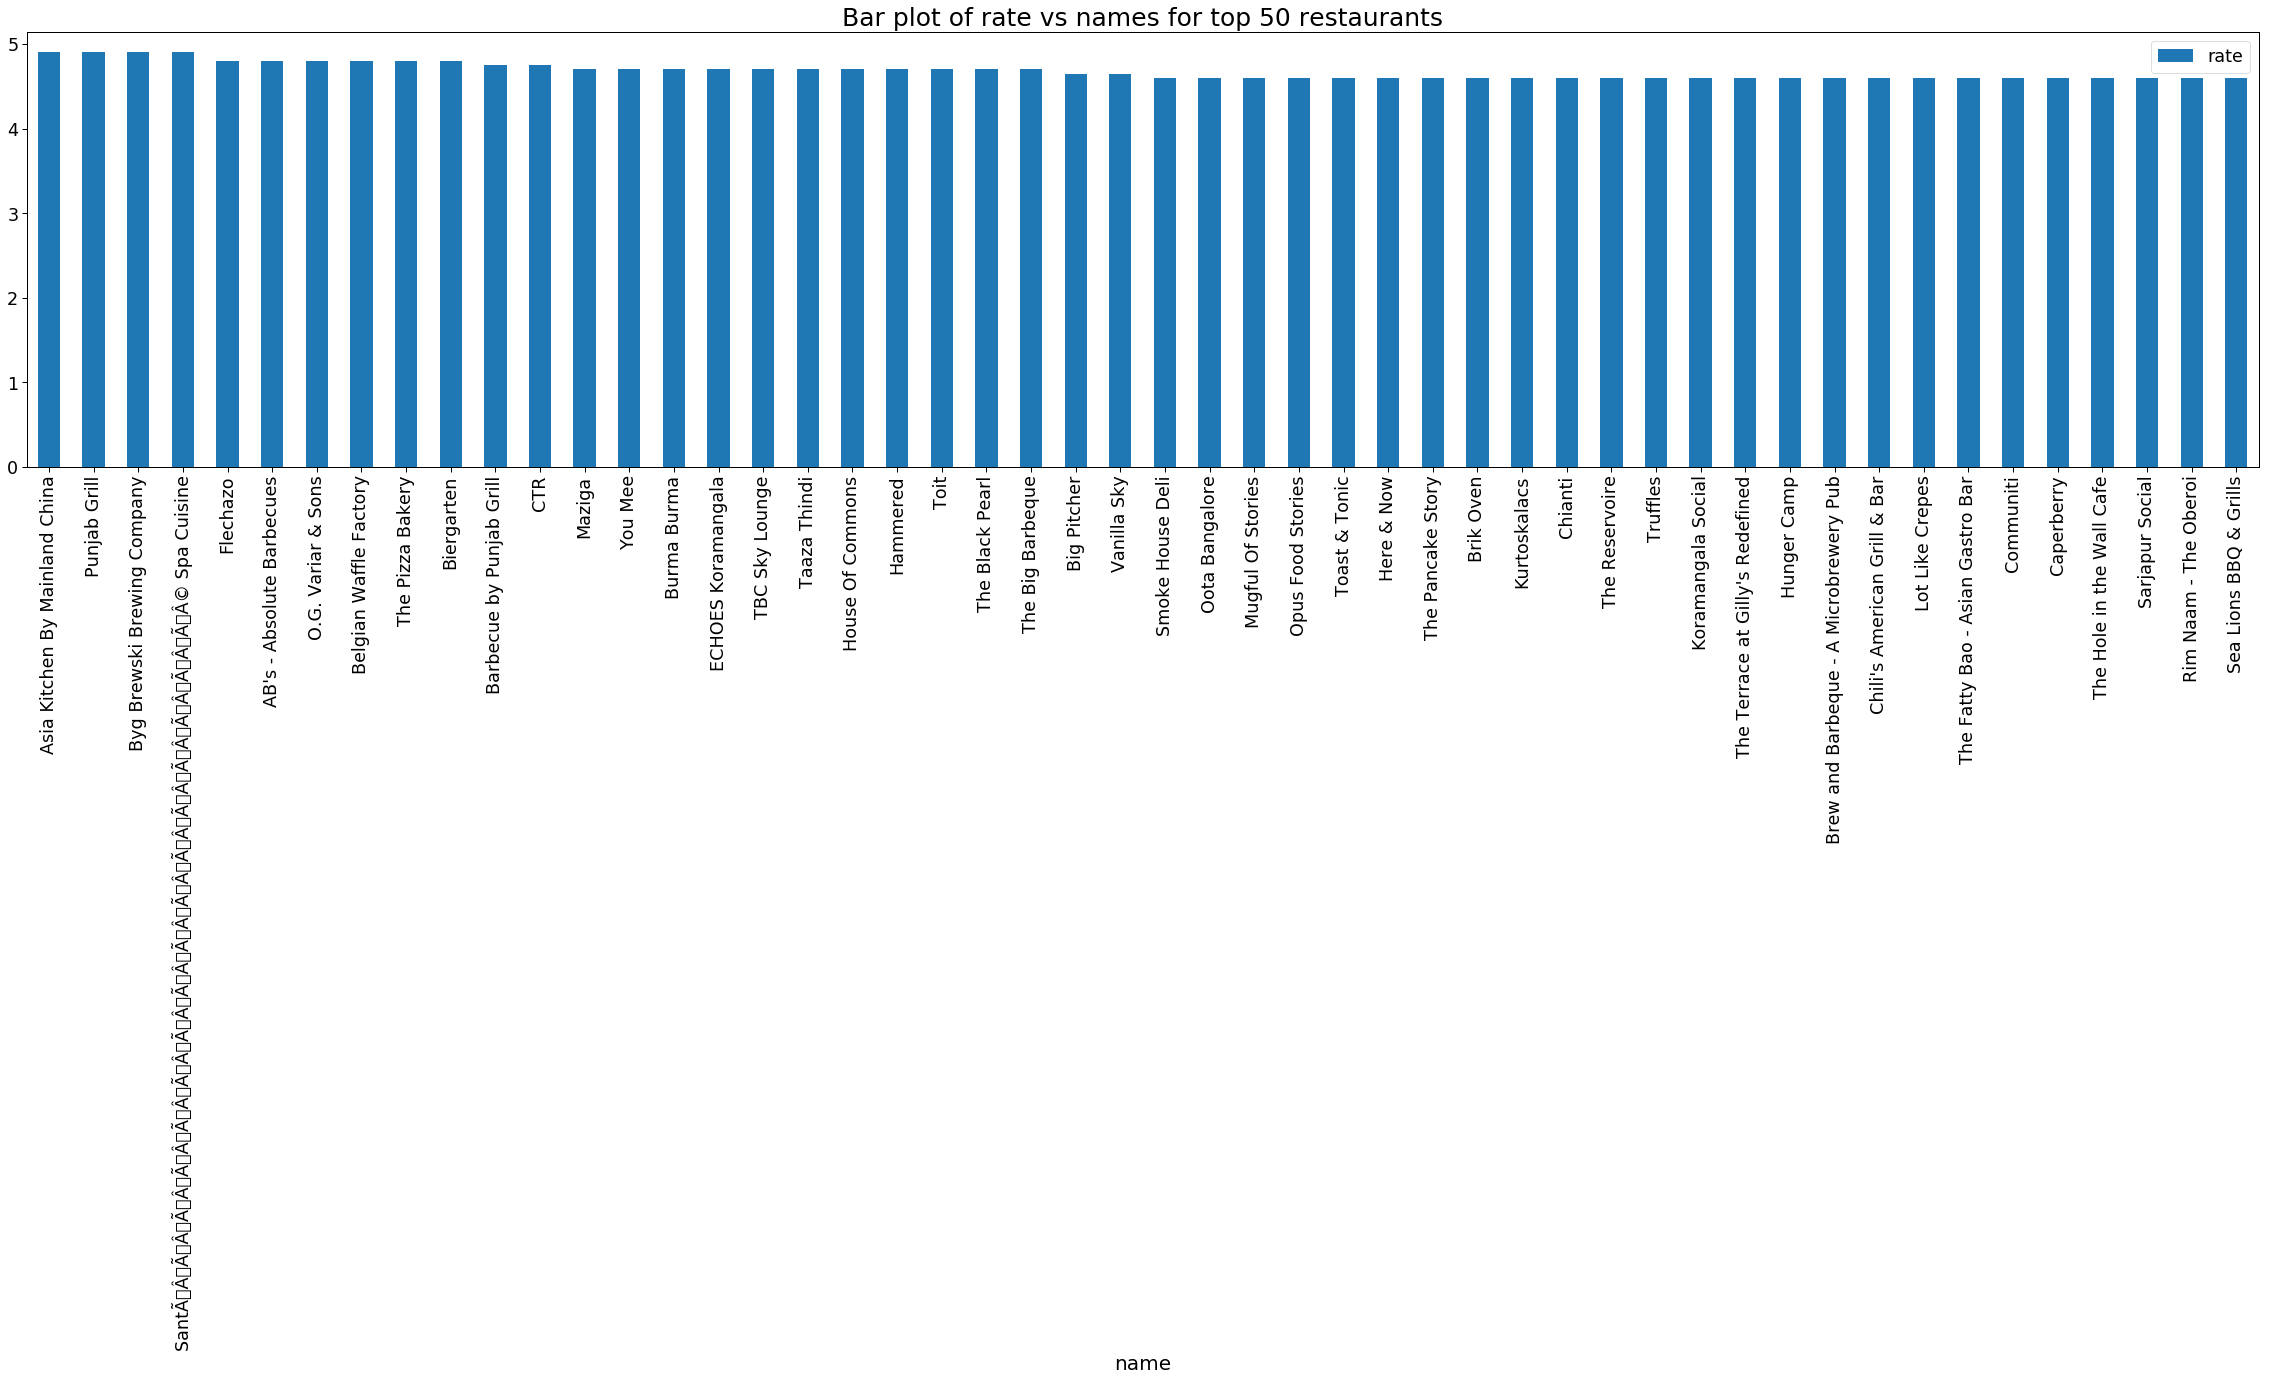

In [65]:
# bar plot of restaurants vs rate for first 50
df[['rate', 'name']].groupby(['name']).median().sort_values("rate", ascending = False).head(50).plot.bar()
plt.title('Bar plot of rate vs names for top 50 restaurants')
fig = plt.gcf()
fig.set_size_inches(40,8)
plt.show()

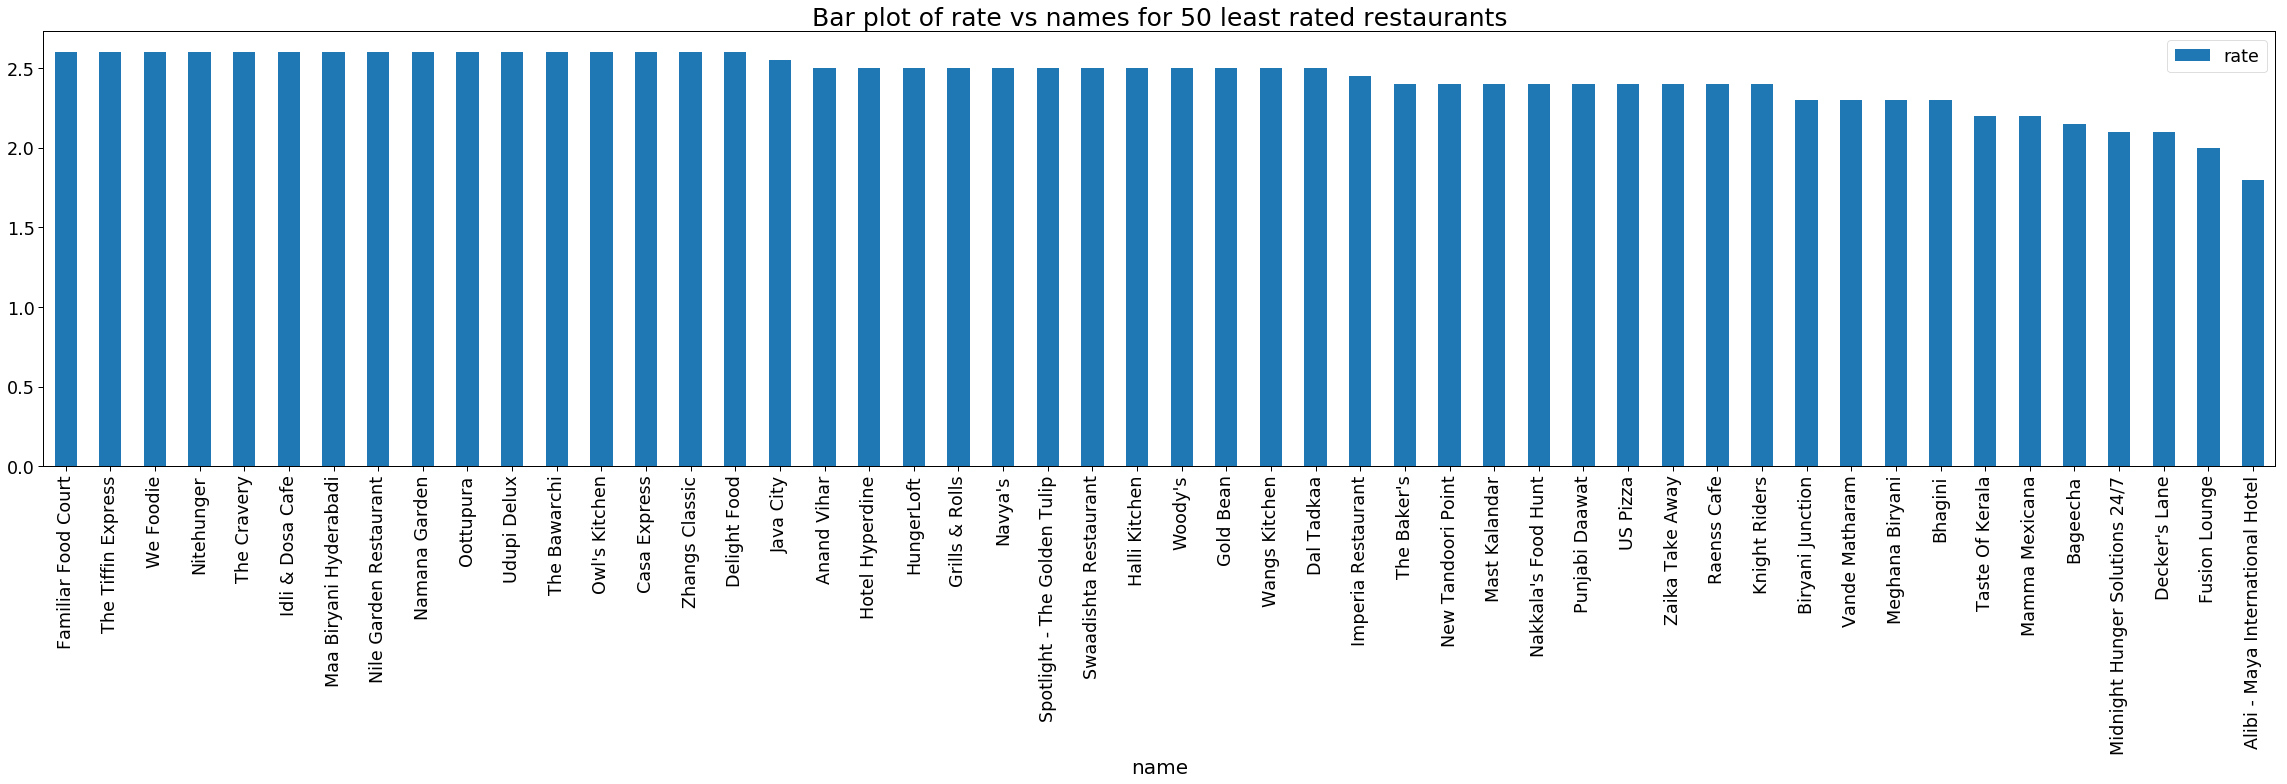

In [110]:
#bar plot of last 50 restaurants as per rate
#a = a[0: len(a)-1]
a = pd.DataFrame(df['rate'])
a['name'] = df['name']
a = a.dropna(axis = 0, how ='any')
a[['rate', 'name']].groupby(['name']).median().sort_values("rate", ascending = False).tail(50).plot.bar()
plt.title('Bar plot of rate vs names for 50 least rated restaurants')
fig = plt.gcf()
fig.set_size_inches(40,8)
plt.show()

In [66]:
# removing ',' character from values in avg_cost feature
df['avg_cost'] = df['avg_cost'].apply(lambda x: str(x).replace(',',''))
a = list(df['avg_cost'])
for i in range(0, len(a)):
    if a[i] != 'nan':
        a[i] = int(a[i])
    else:
        a[i] = None
df['avg_cost'] = a

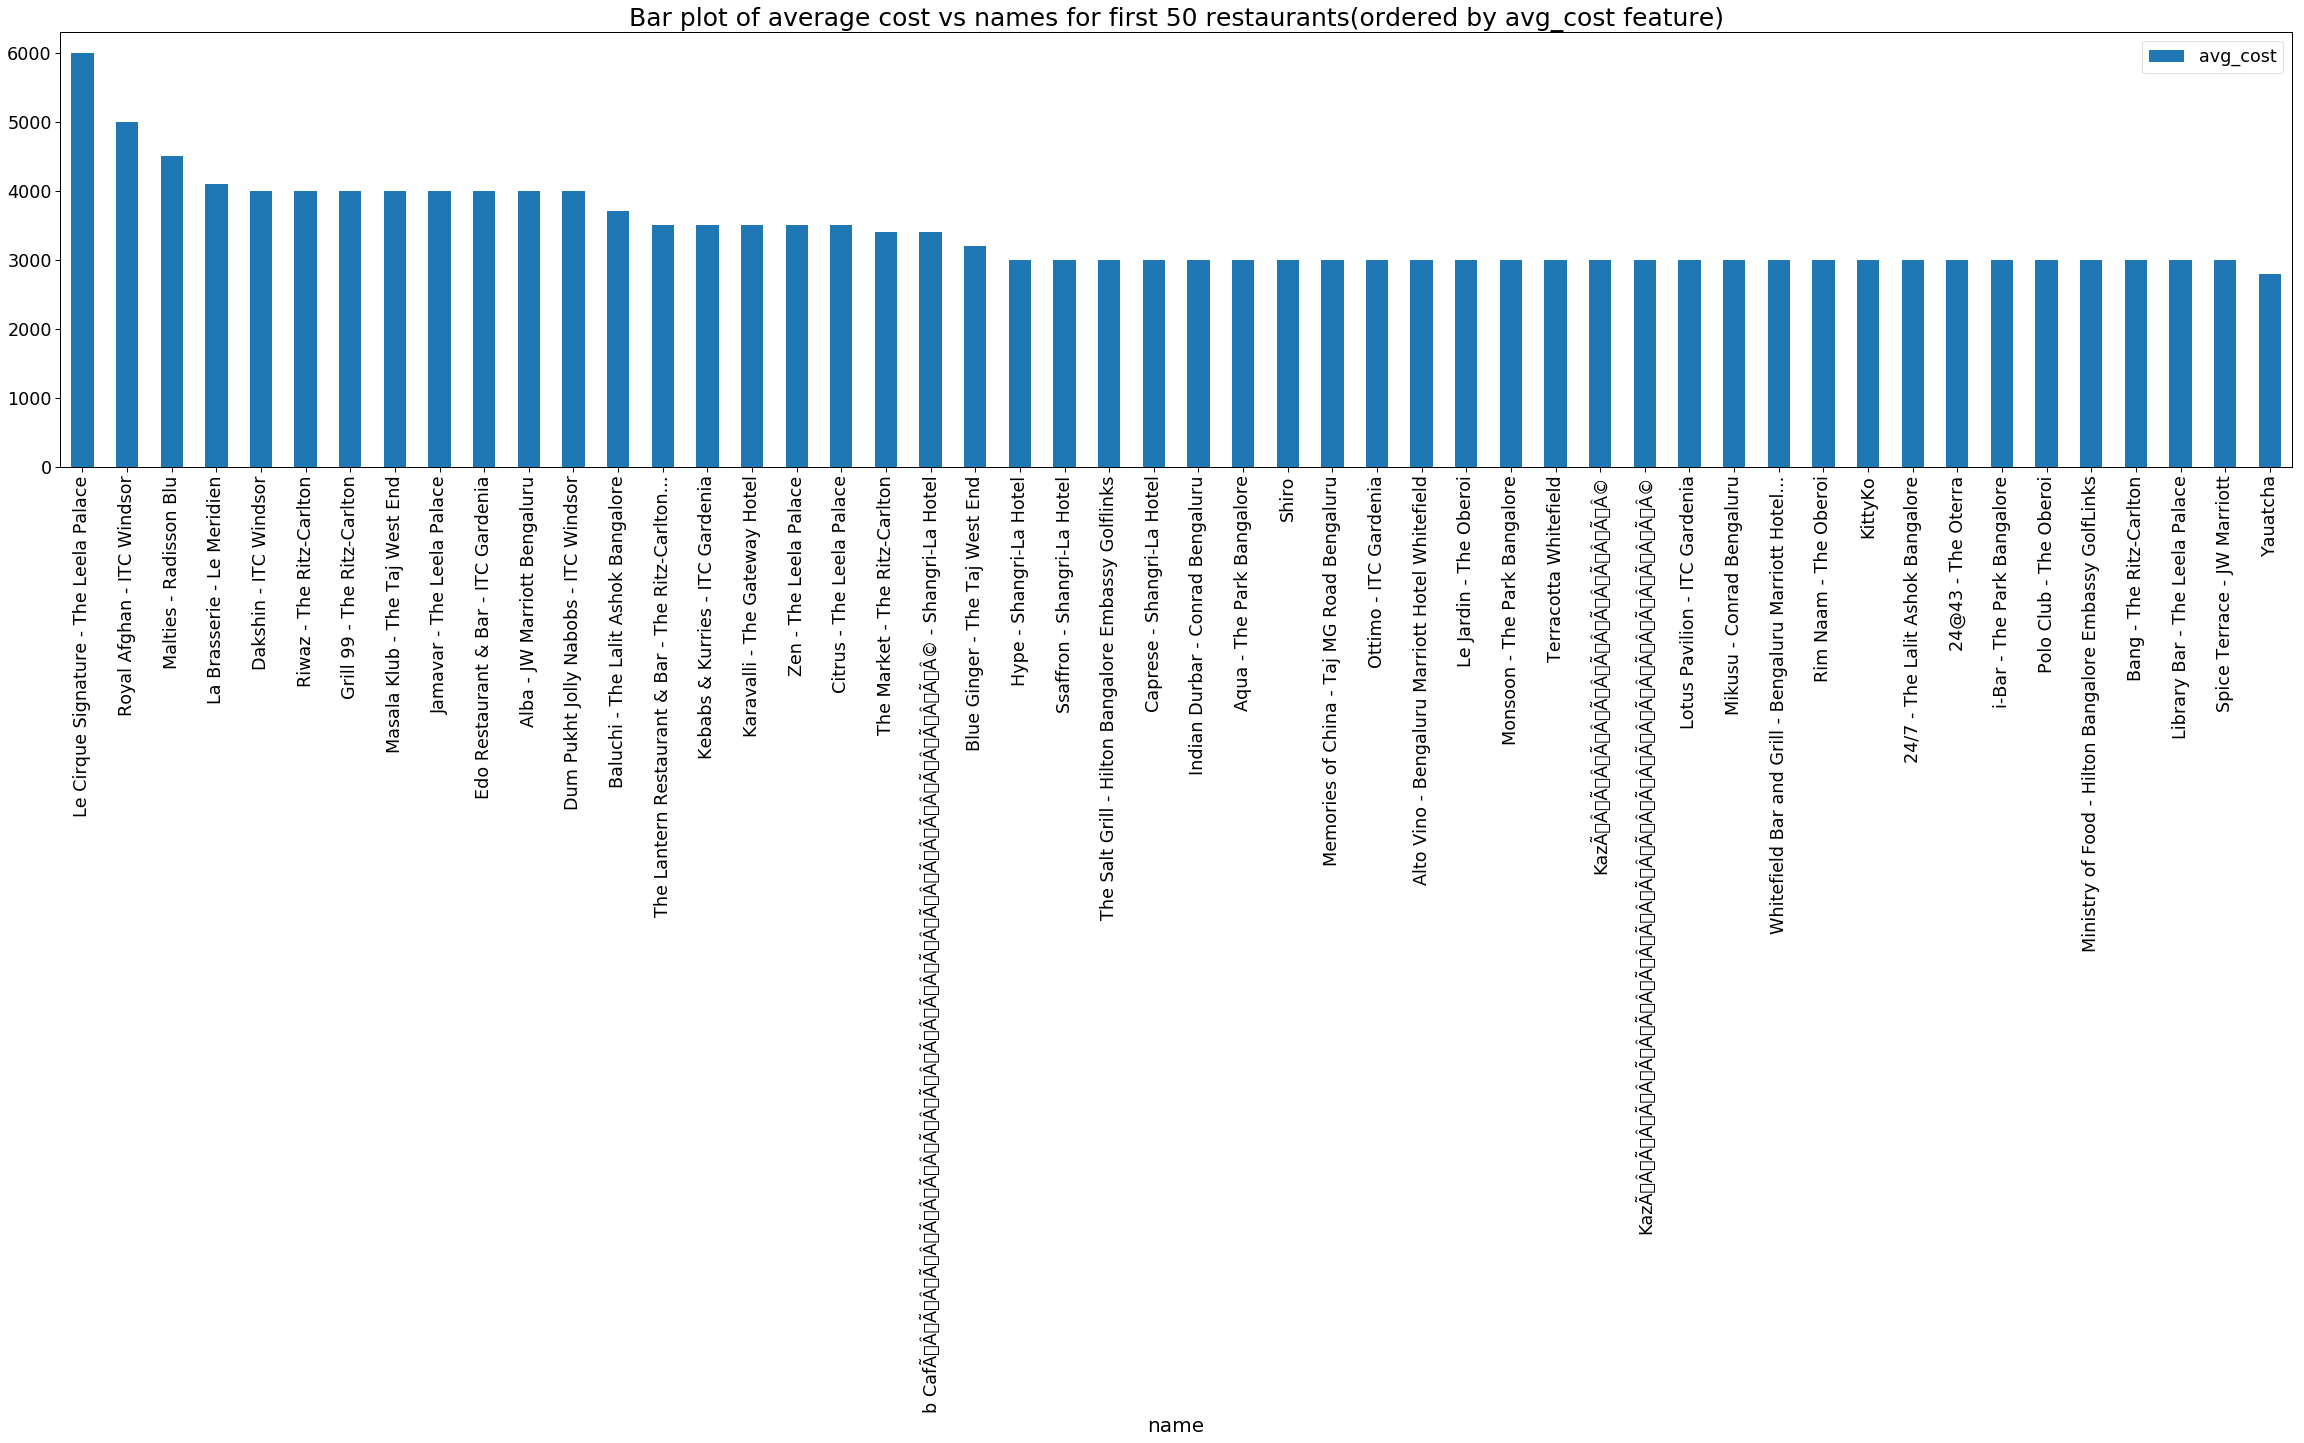

In [113]:
# plotting barplot for name vs average cost for first 50
df[['avg_cost', 'name']].groupby(['name']).median().sort_values("avg_cost", ascending = False).head(50).plot.bar()
plt.title('Bar plot of average cost vs names for first 50 restaurants(ordered by avg_cost feature)')
fig = plt.gcf()
fig.set_size_inches(40,8)
plt.show()

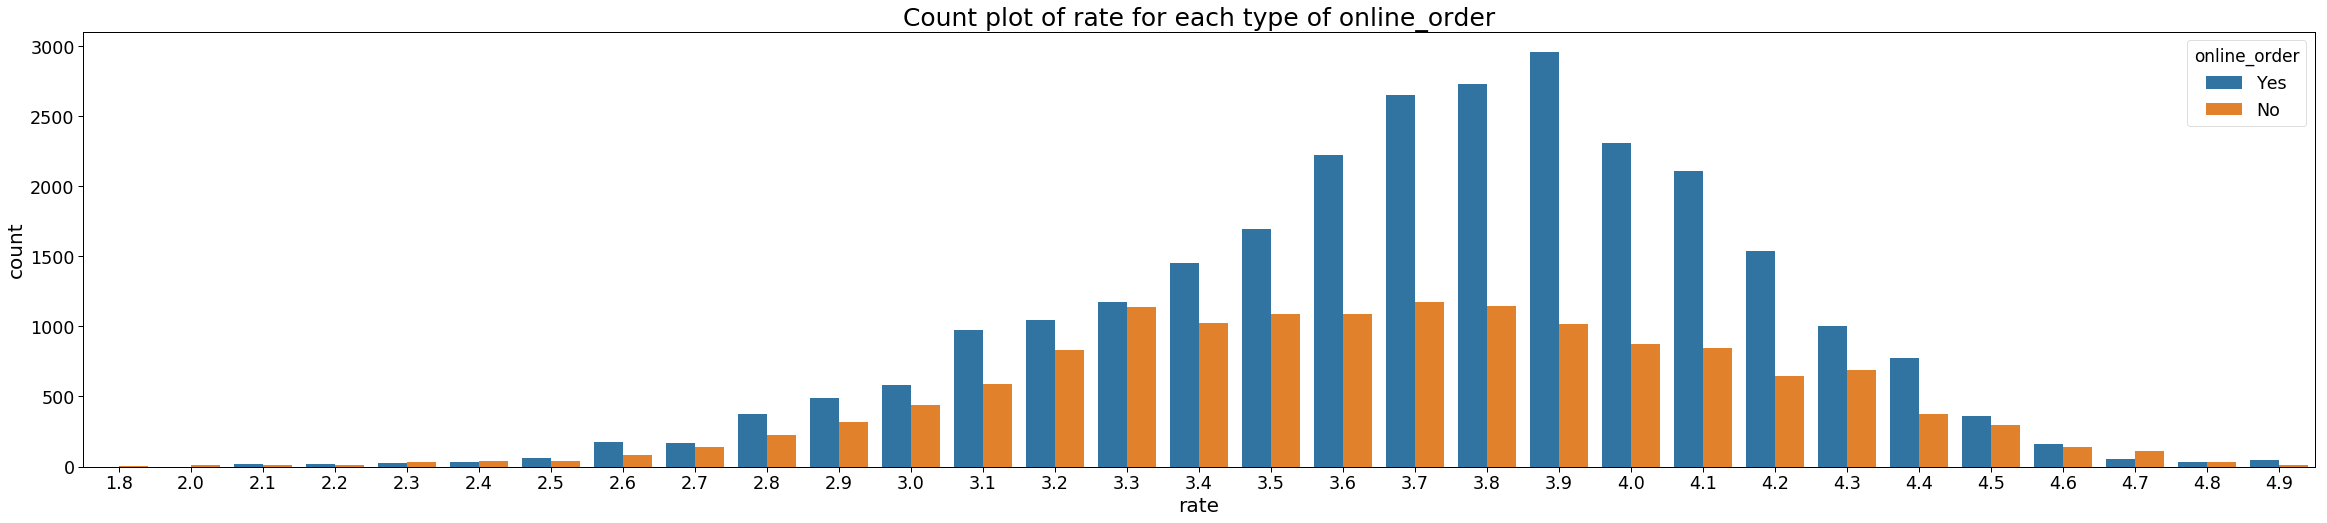

In [67]:
# count plot of rate with hue = online_order
sns.countplot(data = df, hue = 'online_order', x = 'rate')
plt.title('Count plot of rate for each type of online_order')
fig = plt.gcf()
fig.set_size_inches(40,8)
plt.show()

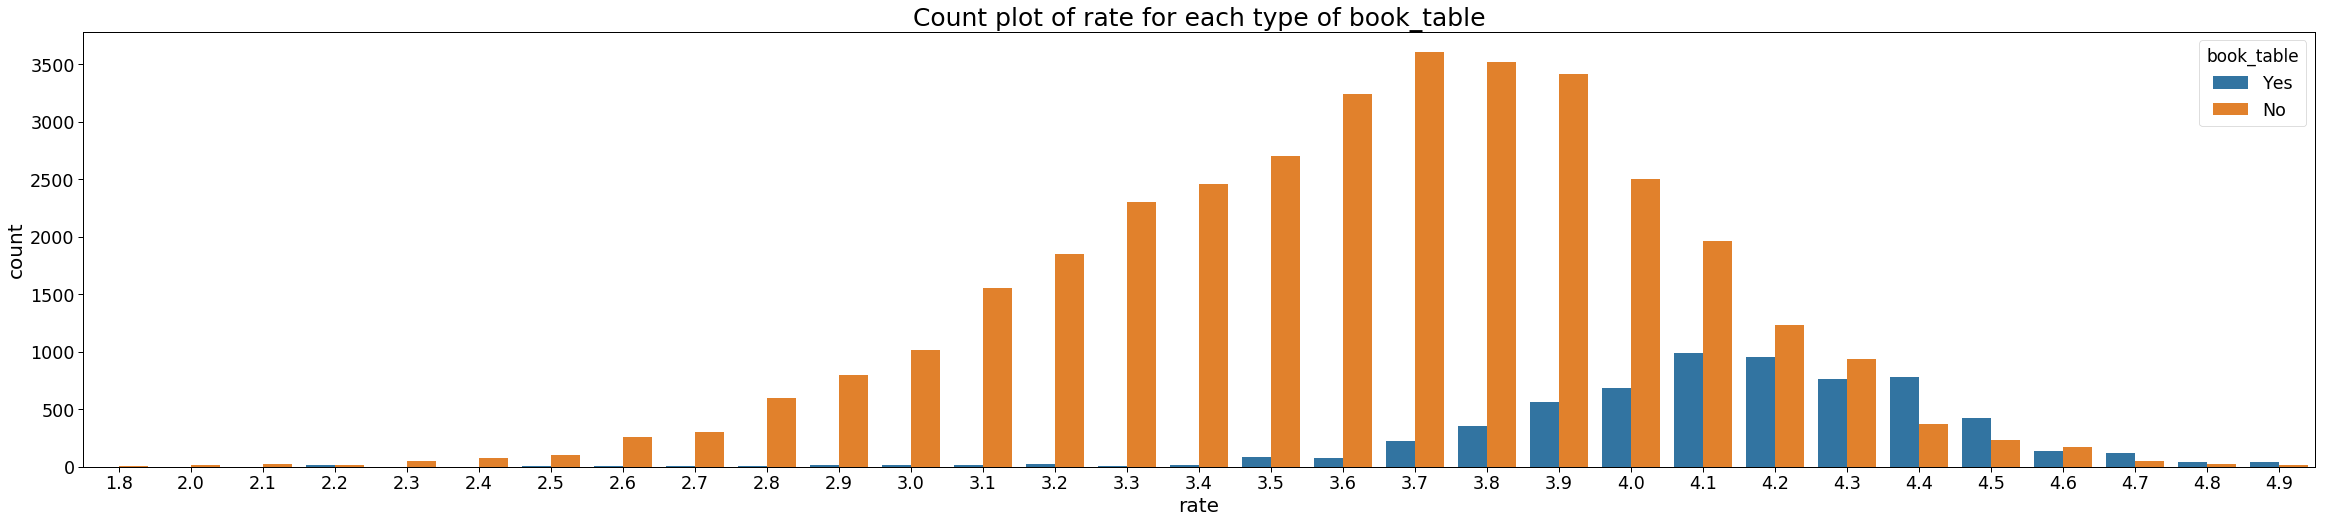

In [117]:
# count plot of rate with hue = book_table
sns.countplot(data = df, hue = 'book_table', x = 'rate')
plt.title('Count plot of rate for each type of book_table')
fig = plt.gcf()
fig.set_size_inches(40,8)
plt.show()

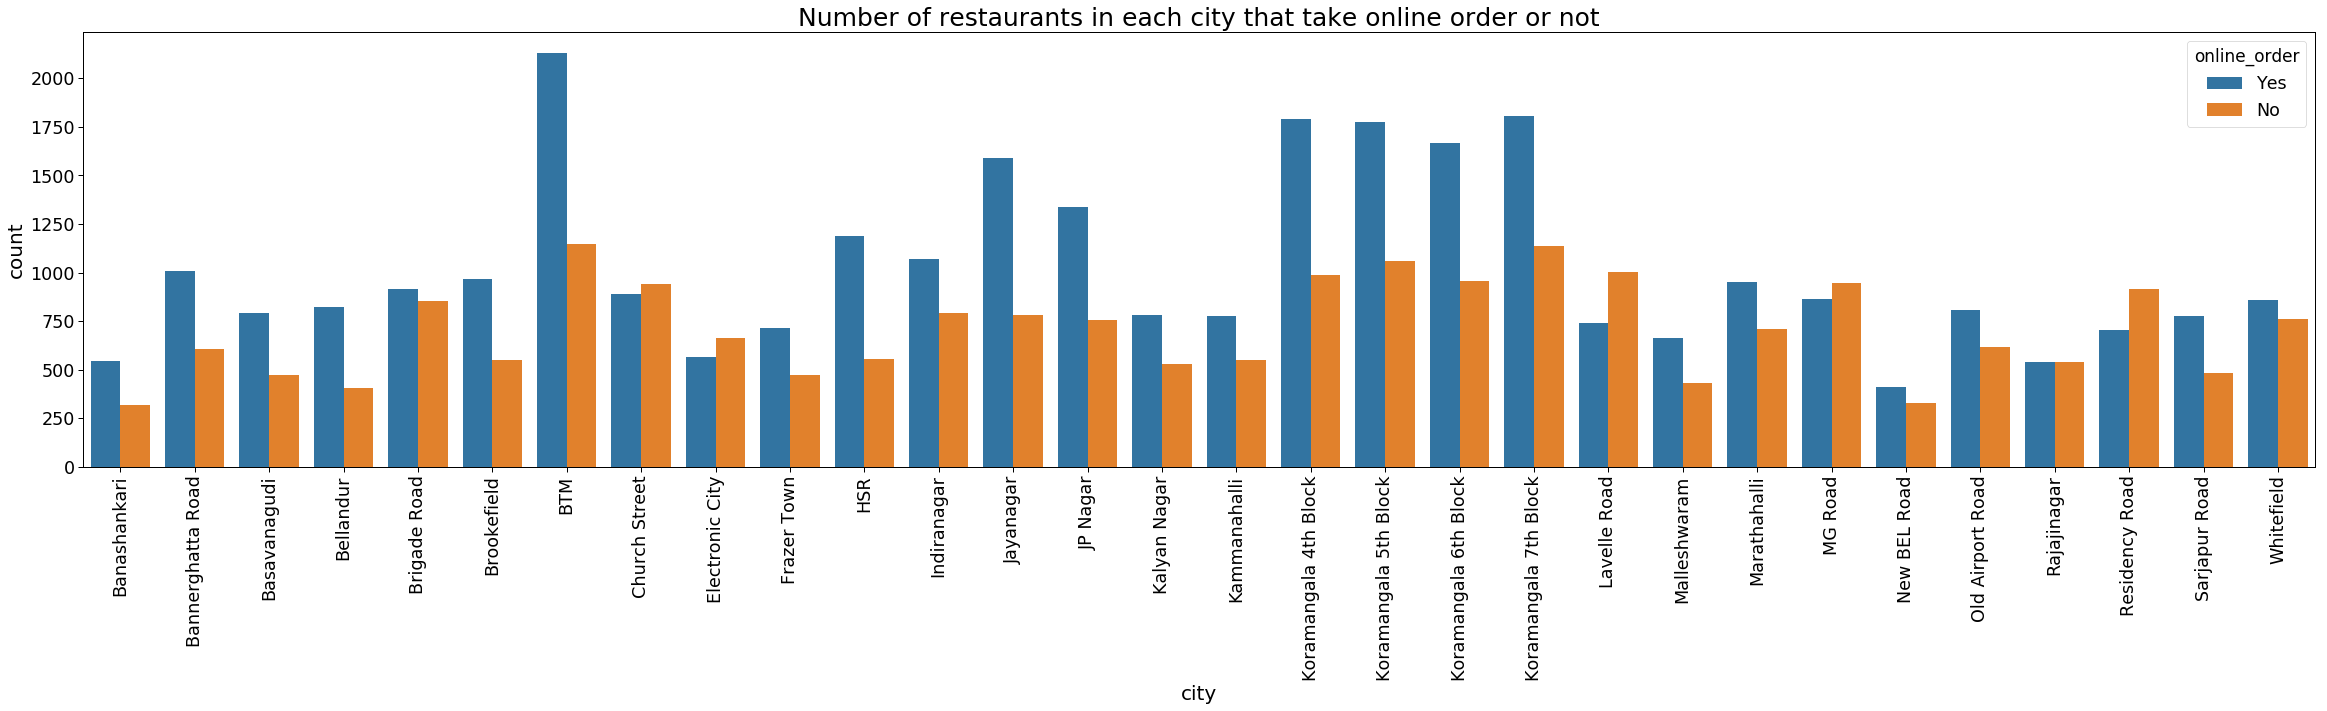

In [119]:
# count plot of restaurants per city with hue = online_order
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.countplot(data = df, x = 'city', hue = 'online_order')
plt.title('Number of restaurants in each city that take online order or not')
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
fig = plt.gcf()
fig.set_size_inches(40,8)
plt.show()

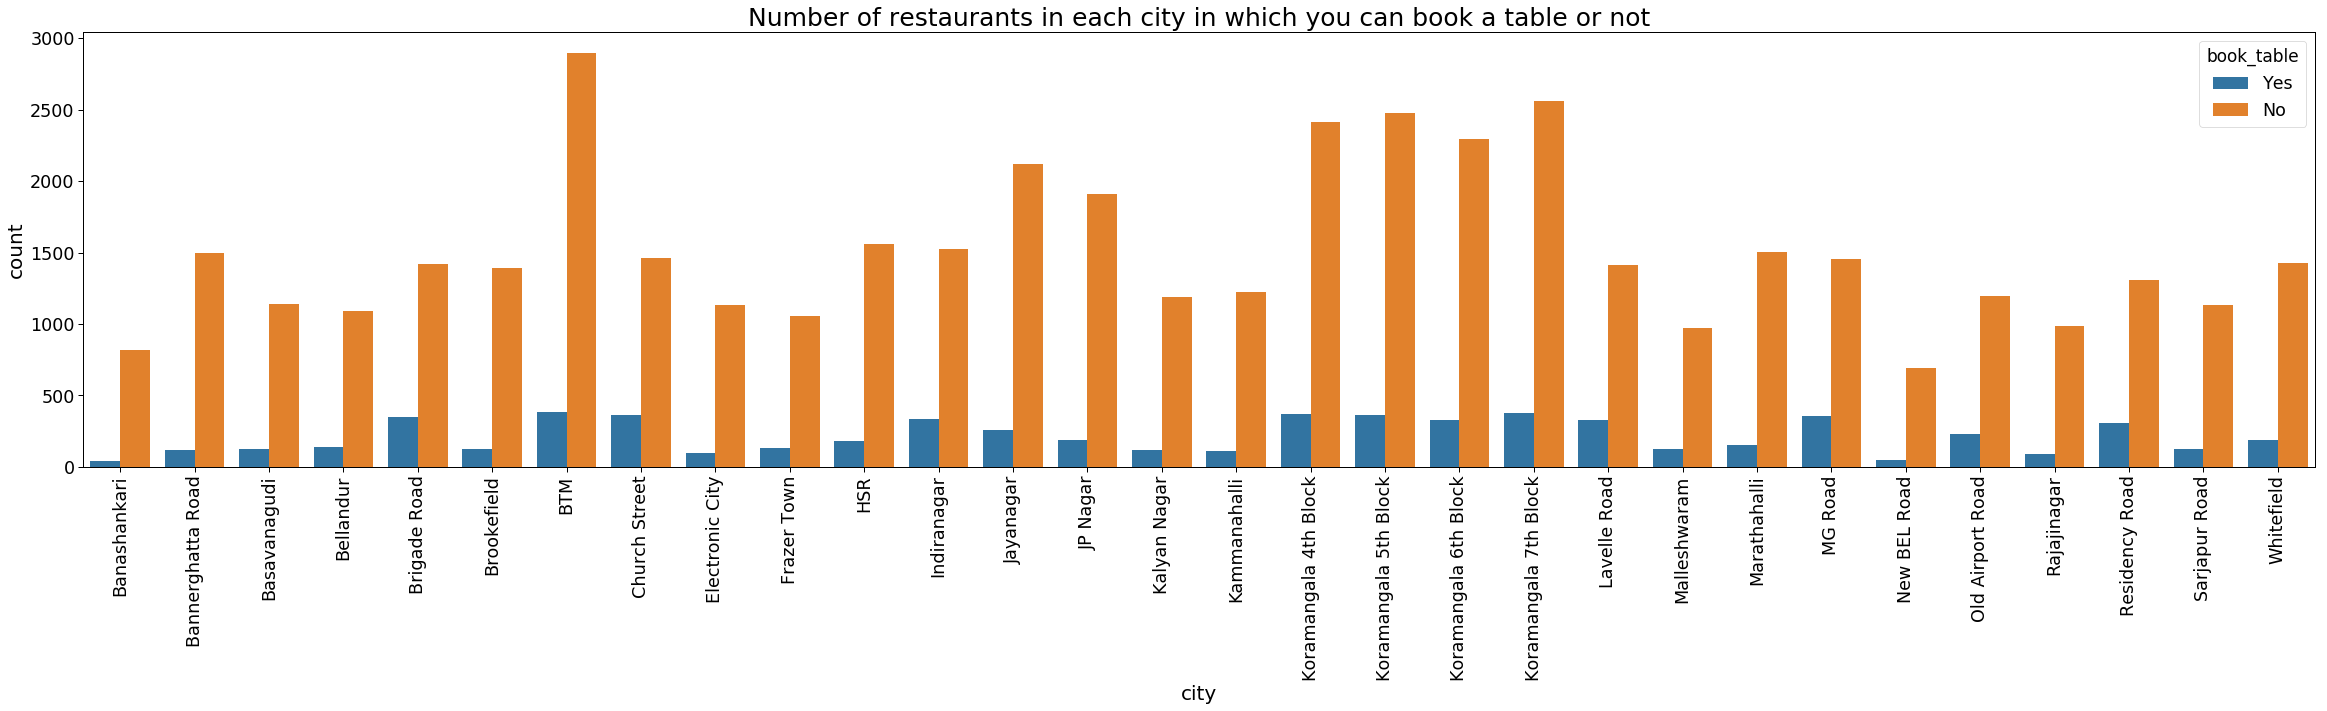

In [121]:
# count plot of restaurants per city with hue = book_table
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.countplot(data = df, x = 'city', hue = 'book_table')
plt.title('Number of restaurants in each city in which you can book a table or not')
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
fig = plt.gcf()
fig.set_size_inches(40,8)
plt.show()

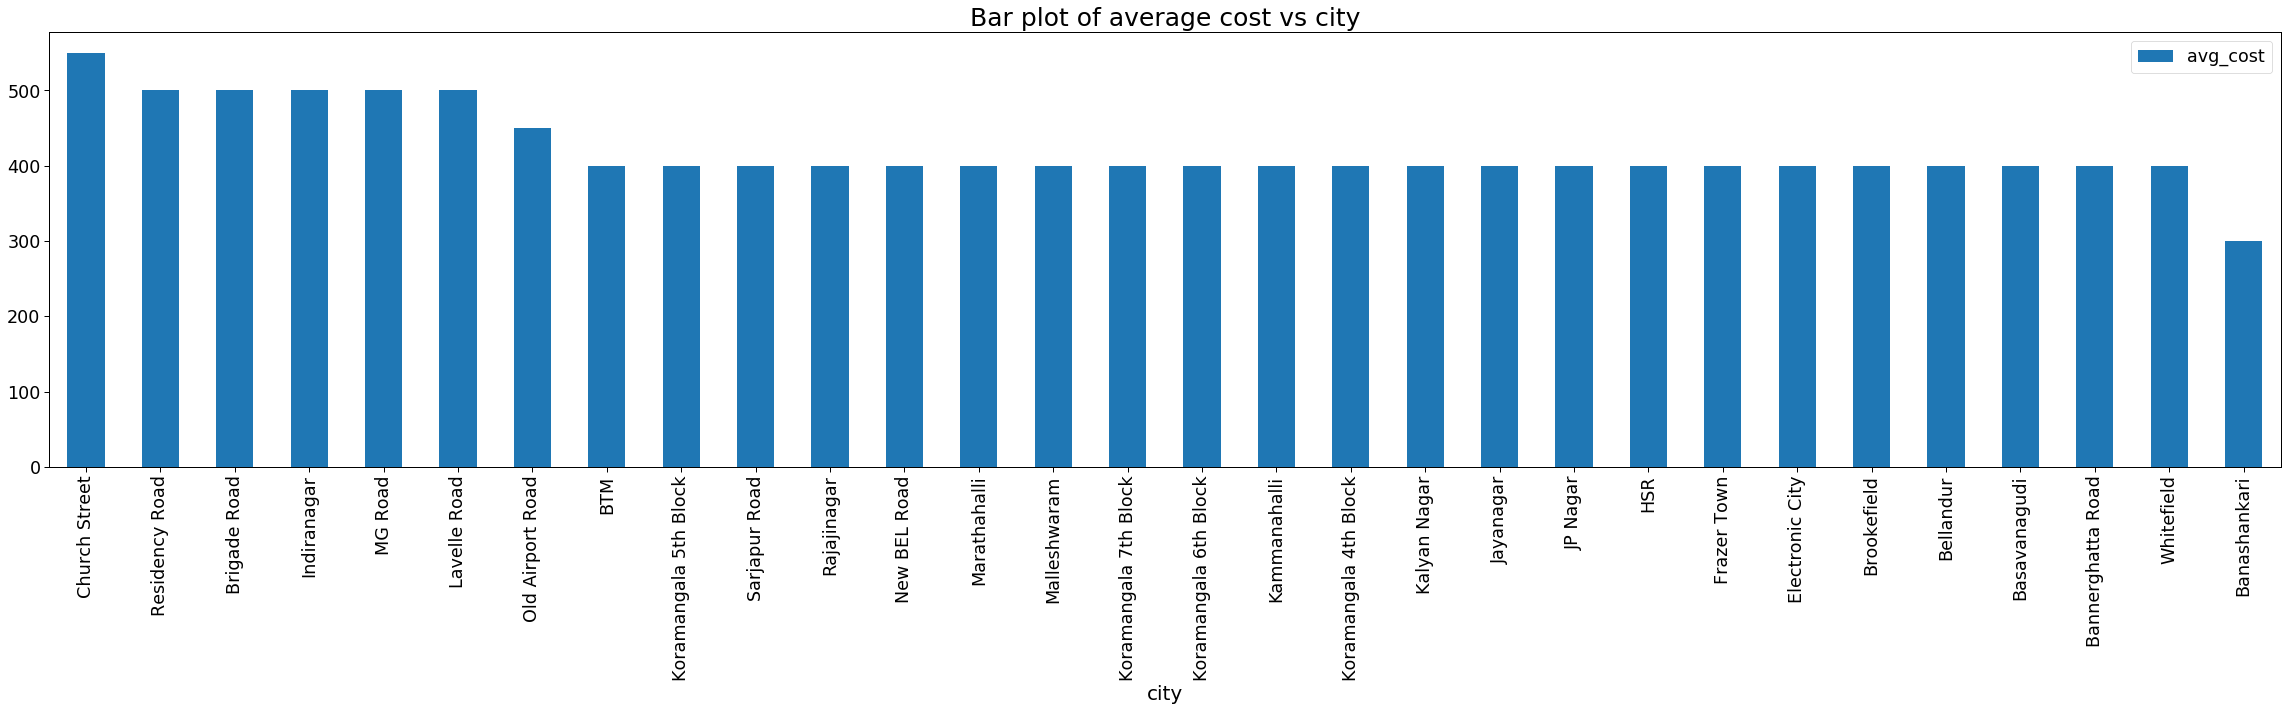

In [123]:
# plotting barplot for city vs average cost
df[['avg_cost', 'city']].groupby(['city']).median().sort_values("avg_cost", ascending = False).plot.bar()
plt.title('Bar plot of average cost vs city')
fig = plt.gcf()
fig.set_size_inches(40,8)
plt.show()
# Which city is costly to eat

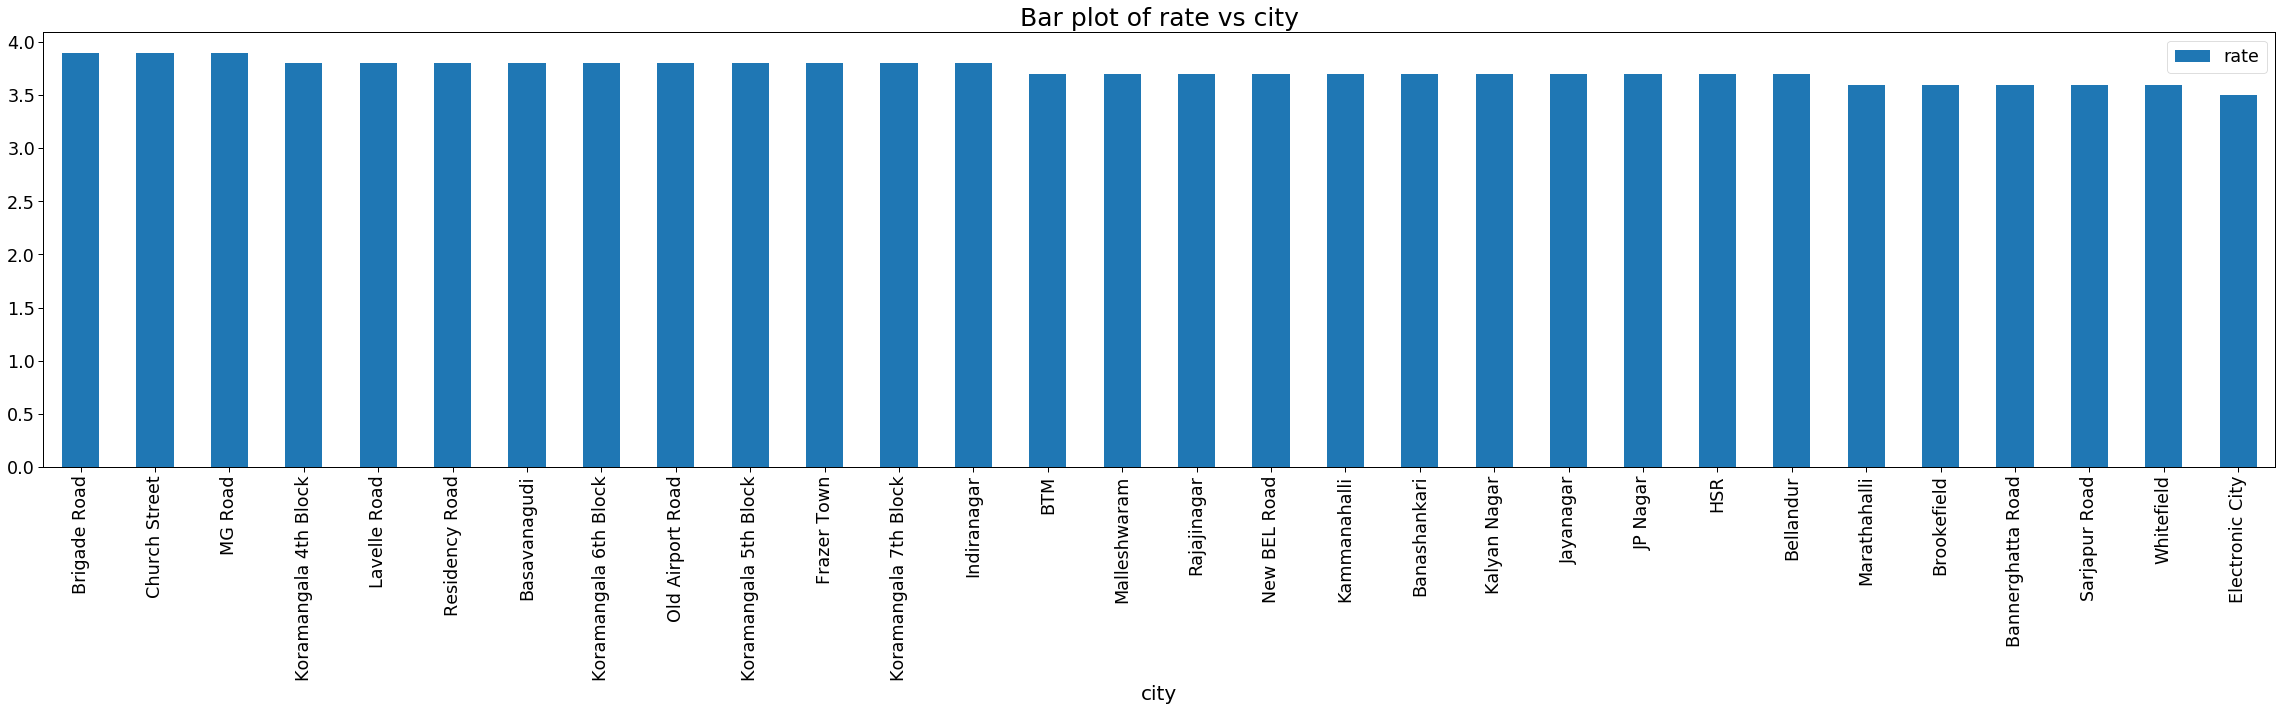

In [125]:
# plotting barplot for city vs rate
# to find out which city is high rated or least rated
df[['rate', 'city']].groupby(['city']).median().sort_values("rate", ascending = False).plot.bar()
plt.title('Bar plot of rate vs city')
fig = plt.gcf()
fig.set_size_inches(40,8)
plt.show()

In [68]:
# plotting the top 10 dishes liked by people 
a = df.iloc[:, :].values
for i in range(0, len(a)):
    if a[i, 6] == 'Friendly Staff':
        print(a[i, 6])
        a[i, 6] = None

Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly S

In [69]:
a = pd.DataFrame(a)
a.columns = df.columns

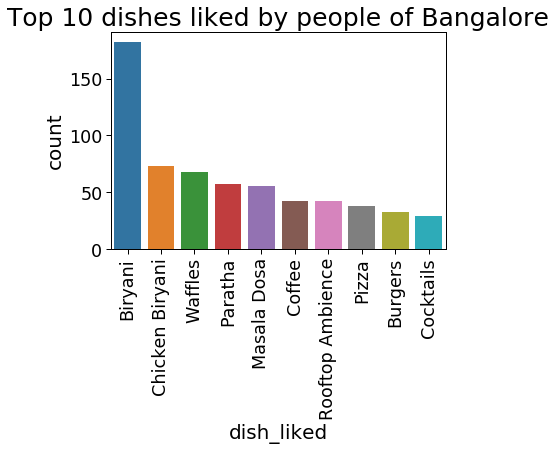

In [70]:
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
b = sns.countplot(data = a, x = 'dish_liked', order = a.dish_liked.value_counts().iloc[: 10].index)
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Top 10 dishes liked by people of Bangalore')
plt.show()